# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [29]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

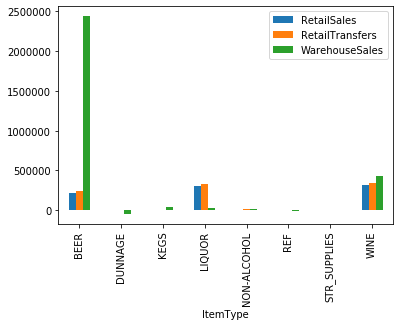

In [3]:
data_plot = data.groupby("ItemType")[["RetailSales", "RetailTransfers", "WarehouseSales"]].agg("sum")
data_plot.plot.bar()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

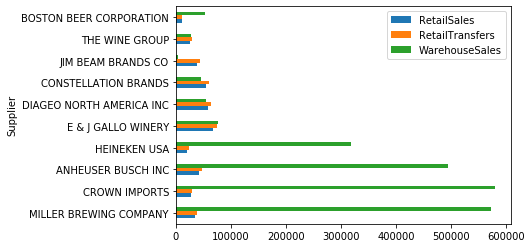

In [4]:
col = ['RetailSales', 'RetailTransfers', 'WarehouseSales']
data_plot = data
data_plot['Ordenar'] = data_plot[col].sum(axis = 1)
data_plot = data.groupby('Supplier').agg('sum').sort_values('Ordenar', axis=0, ascending=False)[['RetailSales', 'RetailTransfers', 'WarehouseSales']][:10]
data_plot.plot.barh()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

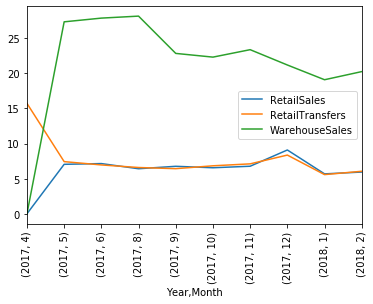

In [5]:
data_plot = data.groupby(['Year','Month'])[["RetailSales", "RetailTransfers", "WarehouseSales"]].agg("mean")
p = data_plot.plot()
p.set_xticks(range(len(data_plot)));
p.set_xticklabels([item for item in data_plot.index.tolist()], rotation=90);
# https://stackoverflow.com/questions/21281322/how-to-plot-a-pandas-multiindex-dataframe-with-all-xticks

## 4. Plot the same information as above but as a bar chart.

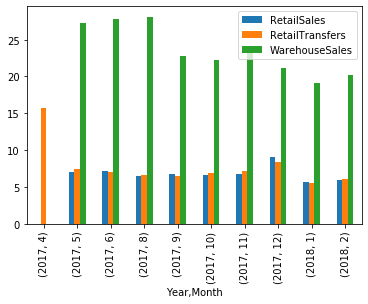

In [6]:
data_plot.plot.bar()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

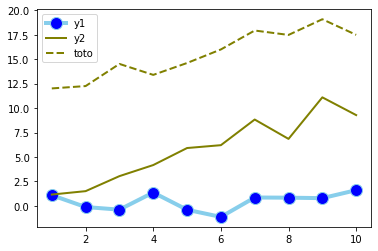

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21) })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()


In [28]:
data_plot.loc[items[0]]

RetailSales
Year Month             
2017 4         0.000000
     5         3.913331
     6         3.964298
     8         3.689469
     9         3.990899
     10        3.957538
     11        4.211236
     12        5.682273
2018 1         3.678568
     2         3.720824

<Figure size 1296x576 with 0 Axes>

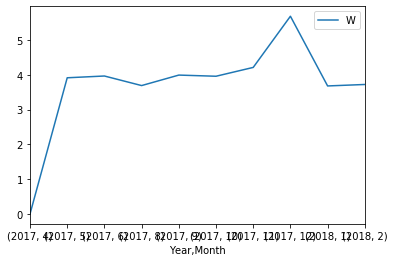

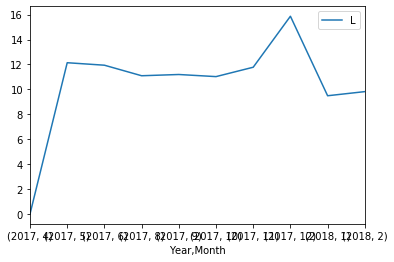

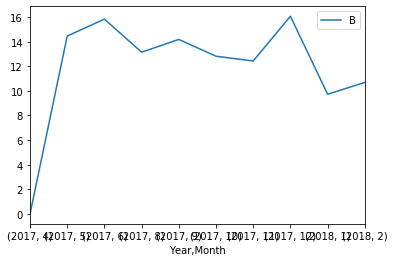

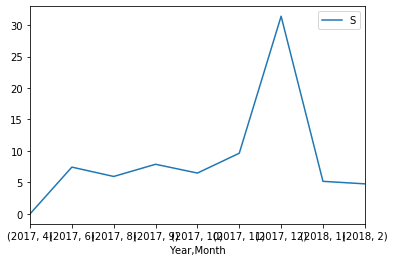

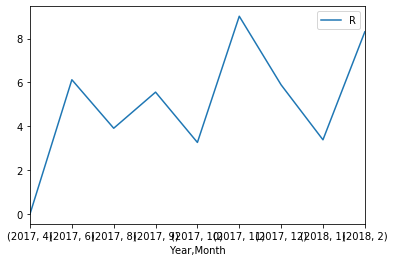

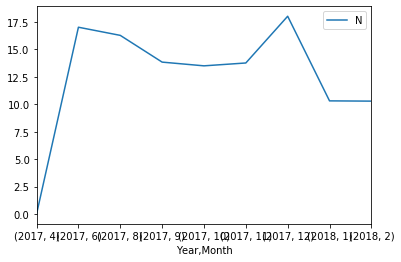

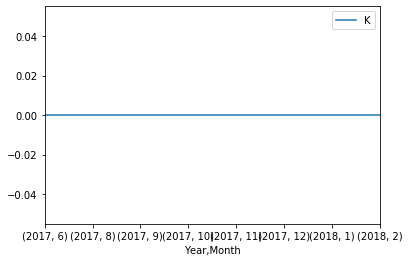

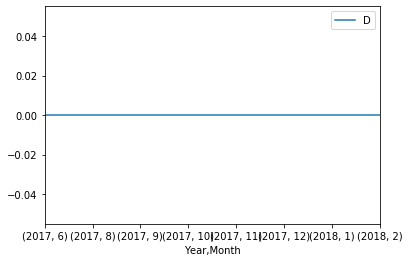

In [27]:
data_plot = pd.pivot_table(data, 'RetailSales', ['ItemType', 'Year','Month'])

items = [item for item in data[data['ItemType'].notnull()]['ItemType'].unique()]

plt.figure(figsize = (18, 8))

for item in items:
    data_plot.loc[item].plot()
    plt.legend(item)


# p = data_plot.plot()
# p.set_xticks(range(len(data_plot)));
# p.set_xticklabels([item for item in data_plot.index.tolist()], rotation=90);

## 6. Plot the same information as above but as a bar chart.

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*